In [1]:
import sys
sys.path.insert(1, '../')

from Utils import *
from modeling import *

In [2]:
X_data, Y_data, x_test = load_data_custom(normalize = False)

from sklearn.metrics.pairwise import cosine_similarity

def cosine_classifier(x,y):
    return 1/2 + (cosine_similarity([x], [y])**2)/2

data = pd.DataFrame(X_data, columns = ['x1', 'x2']) #cosine_classifier(X_data[0], x_test)[0]
y = [c[1] for c in Y_data]
p = [cosine_classifier(x, x_test)[0][0] for x in X_data]
dist = [cosine_similarity([x], [x_test])[0][0] for x in X_data]
probs = []
dist = np.round(dist,2)

for i,j in zip(y,p):
    if i == 0:
        probs.append(1-j)
    else:
        probs.append(j)

probs = np.array(probs)
data['y'] = np.array(y)
data['cos'] = dist
data['P(y=1)'] = probs
data

,x1,x2,y,cos,P(y=1)
0,1,3,0,0.89,0.10
1,-2,2,1,0.00,0.50
2,3,0,0,0.71,0.25
3,3,1,1,0.89,0.90


In [3]:
X_data, Y_data, x_test = load_data_custom()

qc1 = cos_classifier(X_data[0], x_test, Y_data[0] )
r1 = exec_simulator(qc1)
r1 = retrieve_proba(r1) 
print(r1)

qc2 = cos_classifier(X_data[1], x_test, Y_data[1])
r2 = exec_simulator(qc2)
r2 = retrieve_proba(r2)
print(r2)

qc3 = cos_classifier(X_data[2], x_test, Y_data[2])
r3 = exec_simulator(qc3)
r3 = retrieve_proba(r3)
print(r3)

qc4 = cos_classifier(X_data[3], x_test, Y_data[3])
r4 = exec_simulator(qc4)
r4 = retrieve_proba(r4)
print(r4)

out = [r1, r2, r3, r4]

p0 = [p[0] for p in out]
p1 = [p[1] for p in out]
print(np.mean(p0), np.mean(p1))
r_avg = [np.mean(p0), np.mean(p1)]

[0.893, 0.10699999999999998]
[0.508, 0.492]
[0.732, 0.268]
[0.118, 0.882]
0.56275 0.43725


In [4]:
qc = ensemble_fixed_U(X_data, Y_data, x_test)
r = exec_simulator(qc, n_shots=1000)
r_ens = retrieve_proba(r)
print(r_ens)

[0.577, 0.42300000000000004]


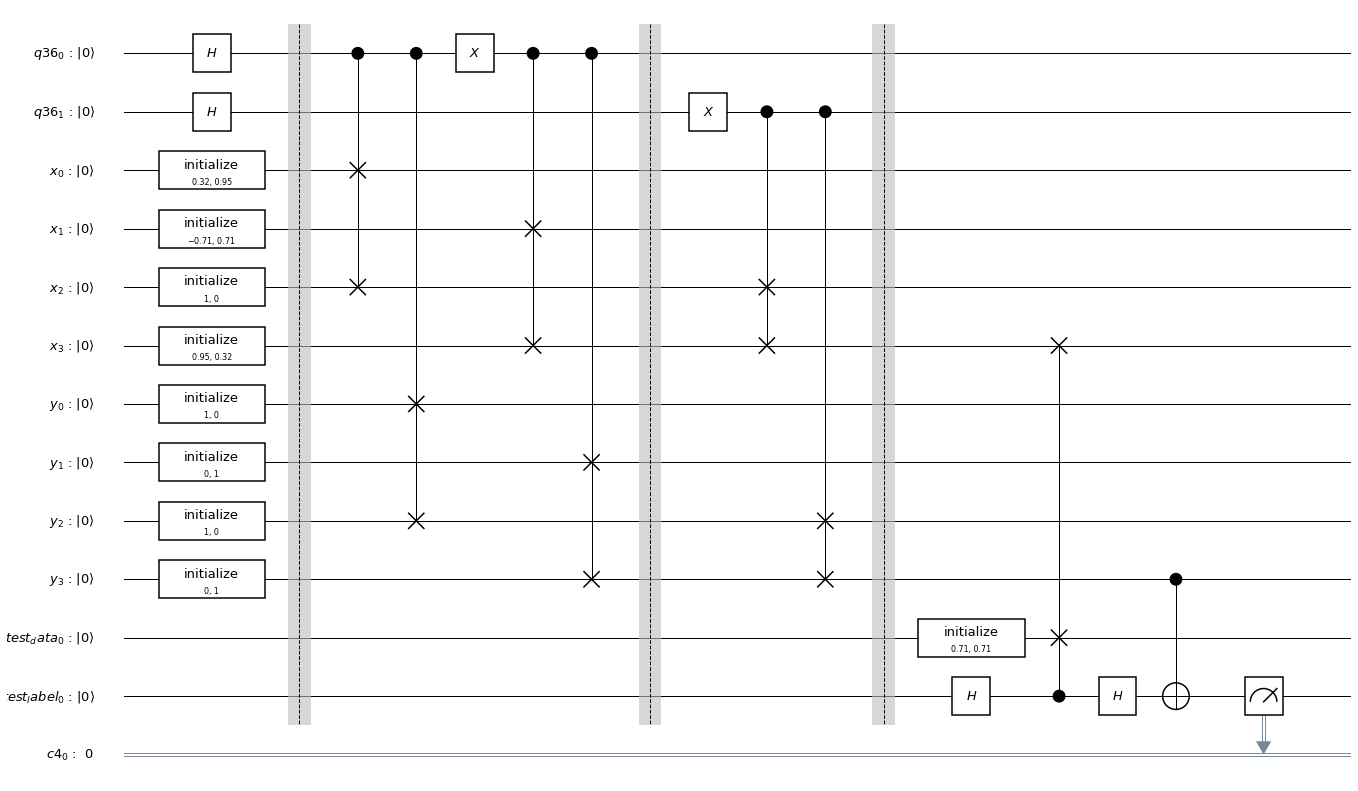

In [5]:
# Change the background color in mpl
# style = {'gatefacecolor': 'lightblue' }

qc.draw(output='mpl', scale=.9, filename='output/qiskit_qc.png')

In [6]:
out = [r1, r2, r3, r4, r_avg, r_ens]
print(out)

[[0.893, 0.10699999999999998], [0.508, 0.492], [0.732, 0.268], [0.118, 0.882], [0.56275, 0.43725], [0.577, 0.42300000000000004]]


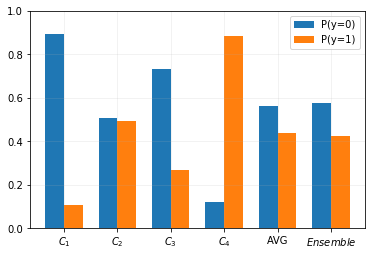

In [8]:
plot_cls(out, title= '', file='SIM_ens_vs_single.png')

data_pred = pd.DataFrame(out, columns=['p0', 'p1'])
data_pred.to_csv('output/sim_results', index=False)

In [9]:
# Execution on real device
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = provider.get_backend('ibmq_rome')
# optimization_level=3

def run_real_device(qc, backend, shots=8192):
    job = execute(qc, backend, shots=shots)
    results = job.result()
    r = results.get_counts(qc)
    return r

In [10]:
qc1 = cos_classifier(X_data[0], x_test, Y_data[0])
r1 = run_real_device(qc1, backend)
r1 = retrieve_proba(r1)
print(r1)

qc2 = cos_classifier(X_data[1], x_test, Y_data[1])
r2 = run_real_device(qc2, backend)
r2 = retrieve_proba(r2)
print(r2)

qc3 = cos_classifier(X_data[2], x_test, Y_data[2])
r3 = run_real_device(qc3, backend)
r3 = retrieve_proba(r3)
print(r3)

qc4 = cos_classifier(X_data[3], x_test, Y_data[3])
r4 = run_real_device(qc4, backend)
r4 = retrieve_proba(r4)
print(r4)

out = [r1, r2, r3, r4]

p0 = [p[0] for p in out]
p1 = [p[1] for p in out]
print(np.mean(p0), np.mean(p1))
r_avg = [np.mean(p0), np.mean(p1)]

backend = provider.get_backend('ibmq_16_melbourne')

qc = ensemble_fixed_U(X_data, Y_data, x_test)
r_ens = run_real_device(qc1, backend)
r_ens = retrieve_proba(r_ens)
print(r_ens)

out = [r1, r2, r3, r4, r_avg, r_ens]
print(out)

[0.739501953125, 0.260498046875]
[0.5048828125, 0.4951171875]
[0.6839599609375, 0.3160400390625]
[0.3077392578125, 0.6922607421875]
0.55902099609375 0.44097900390625
[0.5093994140625, 0.4906005859375]
[[0.739501953125, 0.260498046875], [0.5048828125, 0.4951171875], [0.6839599609375, 0.3160400390625], [0.3077392578125, 0.6922607421875], [0.55902099609375, 0.44097900390625], [0.5093994140625, 0.4906005859375]]


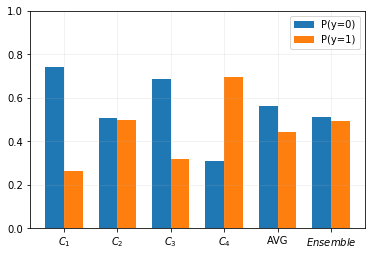

In [11]:
plot_cls(out, title='',
         file='RL_ens_vs_single')
data_pred = pd.DataFrame(out, columns=['p0', 'p1'])
data_pred.to_csv('output/rl_results', index=False)

In [3]:
for i in range(0,12,3):
    print(i)

0
3
6
9
